# Medellin mortality rates maps at neighborhood level

Mortality data provided by Silvana Zapata, from Medellin Health Secretary.
Neighborhood geographies downloaded from Medellin Open Data portal: 
https://www.medellin.gov.co/mapas/rest/services/ServiciosPlaneacion/POT48_Base/MapServer/4

In [1]:
# Load libraries
import pandas as pd
from pandas import ExcelWriter 
from pandas import ExcelFile # for reading excel files
import geopandas as gpd
import matplotlib.pyplot as plt

## Load data

In [2]:
# Load excel file (diseases rates) as dataframe

rates_path = '../recibidosSecSalud/20190430/DatosEafitMort.xlsx'
rates_df = pd.read_excel(rates_path)
rates_df.head()

CODIGO                    NOMBRE                   NOMBRE2 IDENTIFICA  \
0   0101  Santo Domingo Savio No.1  SANTO DOMINGO SAVIO NO.1       0101   
1   0102  Santo Domingo Savio No.2  SANTO DOMINGO SAVIO NO.2       0102   
2   0103                   Popular                   POPULAR       0103   
3   0104                  Granizal                  GRANIZAL       0104   
4   0105               Mosc├║ No.2                MOSCÚ NO.2       0105   

  LIMITECOMU  ZHFISICAGE  LIMITEMUNI  VIGENCIA_F  SUBTIPO_BA  LINK_DOCUM  \
0         01         NaN           1         NaN           1         NaN   
1         01         NaN           1         NaN           1         NaN   
2         01         NaN           1         NaN           1         NaN   
3         01         NaN           1         NaN           1         NaN   
4         01         NaN           1         NaN           1         NaN   

               ...                TS-Mrts_Cdpmn(I26-I45, I47-I49, I51)-2016  \
0              ...                                                        0   
1              ...                                                  11.6198   
2              ...                                                  4.35161   
3              ...                                                        0   
4              ...                                                  5.99377   

   TS-Mrts_Cdpmn(I26-I45, I47-I49, I51)-2017  \
0                                    18.6419   
1                                     11.566   
2                                    4.34065   
3                                    7.70416   
4                                     17.991   

  TS-AJ-Mrts_Cdpmn(I26-I45, I47-I49, I51)-2016  \
0                                            0   
1                                      11.3466   
2                                      4.18288   
3                                            0   
4                                      5.39739   

  TS-AJ-Mrts_Cdpmn(I26-I45, I47-I49, I51)-2017 Mrts_Dbts(E10-E14)-2016  \
0                                      20.1316                       3   
1                                      10.3868                       0   
2                                      4.93263                       4   
3                                      8.58757                       0   
4                                      20.8706                       2   

  Mrts_Dbts(E10-E14)-2017 TS-Mrts_Dbts(E10-E14)-2016  \
0                       4                     13.973   
1                       1                          0   
2                       1                    17.4064   
3                       0                          0   
4                       0                    11.9875   

  TS-Mrts_Dbts(E10-E14)-2017 TS-AJU-Mrts_Dbts(E10-E14)-2016  \
0                    18.6419                        15.2113   
1                     11.566                              0   
2                    4.34065                        19.4424   
3                          0                              0   
4                          0                        13.7645   

  TS-AJU-Mrts_Dbts(E10-E14)-2017  
0                        21.2031  
1                        11.3067  
2                         4.3043  
3                              0  
4                              0  

[5 rows x 52 columns]

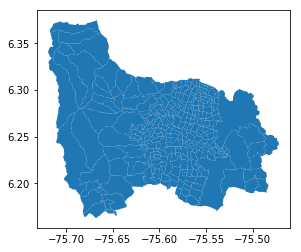

In [3]:
# Load shapefile of neighborhoods

neigh_path = '../Barrio_Vereda/Barrio_Vereda.shp'
neigh = gpd.read_file(neigh_path)
neigh.plot()

## Filter data
Filter to get only spatial units in the urban area (neighborhoods) and remove no data values ('ND') from geodataframe.

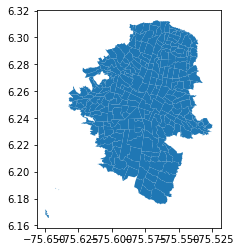

In [4]:
# Neighborhoods, filter by SUBTIPO_BA = 1 (urban)

neigh = neigh[neigh.SUBTIPO_BA == 1]
neigh.plot()

In [5]:
# Drop duplicated fields from rates_df

# Check column names in rates dataframe
rates_df.columns

Index(['CODIGO', 'NOMBRE', 'NOMBRE2', 'IDENTIFICA', 'LIMITECOMU', 'ZHFISICAGE',
       'LIMITEMUNI', 'VIGENCIA_F', 'SUBTIPO_BA', 'LINK_DOCUM', 'SHAPE_Leng',
       'SHAPE_Area', 'CODIGO.1', 'Pob_Barrio_2016', 'Pob_Barrio_2017',
       'CODIGO.2', 'Mrts_StmCrltro(I00-I99)-2016',
       'Mrts_StmCrltro(I00-I99)-2017', 'TS-Mrts_StmCrltro(I00-I99)-2016',
       'TS-Mrts_StmCrltro(I00-I99)-2017', 'TS-AJ-Mrts_StmCrltro(I00-I99)-2016',
       'TS-AJ-Mrts_StmCrltro(I00-I99)-2017', 'Mrts_EIC(I20-I25)-2016',
       'Mrts_EIC(I20-I25)-2017', 'TS-Mrts_EIC(I20-I25)-2016',
       'TS-Mrts_EIC(I20-I25)-2017', 'TS-AJ-Mrts_EIC(I20-I25)-2016',
       'TS-AJ-Mrts_EIC(I20-I25)-2017', 'Mrts_Hiper(I10-I15)-2016',
       'Mrts_Hiper(I10-I15)-2017', 'TS-Mrts_Hiper(I10-I15)-2016',
       'TS-Mrts_Hiper(I10-I15)-2017', 'TS-AJ-Mrts_Hiper(I10-I15)-2016',
       'TS-AJ-Mrts_Hiper(I10-I15)-2017', 'Mrts_CV(I60-I69)-2016',
       'Mrts_CV(I60-I69)-2017', 'TS-Mrts_CV(I60-I69)-2016',
       'TS-Mrts_CV(I60-I69)-2017', 

In [6]:
# Check column names in neighborhoods geodataframe
neigh.columns

Index(['OBJECTID', 'CODIGO', 'NOMBRE', 'SUBTIPO_BA', 'SHAPEAREA', 'SHAPELEN',
       'geometry'],
      dtype='object')

In [7]:
# Drop fields with duplicated information

drop_columns = ['NOMBRE', 'NOMBRE2', 'IDENTIFICA', 'LIMITECOMU', 'ZHFISICAGE',
                'LIMITEMUNI', 'VIGENCIA_F', 'SUBTIPO_BA', 'LINK_DOCUM', 
                'SHAPE_Leng', 'SHAPE_Area', 'CODIGO.1', 'CODIGO.2']
rates_df.drop(drop_columns, inplace=True, axis=1)
rates_df.columns

Index(['CODIGO', 'Pob_Barrio_2016', 'Pob_Barrio_2017',
       'Mrts_StmCrltro(I00-I99)-2016', 'Mrts_StmCrltro(I00-I99)-2017',
       'TS-Mrts_StmCrltro(I00-I99)-2016', 'TS-Mrts_StmCrltro(I00-I99)-2017',
       'TS-AJ-Mrts_StmCrltro(I00-I99)-2016',
       'TS-AJ-Mrts_StmCrltro(I00-I99)-2017', 'Mrts_EIC(I20-I25)-2016',
       'Mrts_EIC(I20-I25)-2017', 'TS-Mrts_EIC(I20-I25)-2016',
       'TS-Mrts_EIC(I20-I25)-2017', 'TS-AJ-Mrts_EIC(I20-I25)-2016',
       'TS-AJ-Mrts_EIC(I20-I25)-2017', 'Mrts_Hiper(I10-I15)-2016',
       'Mrts_Hiper(I10-I15)-2017', 'TS-Mrts_Hiper(I10-I15)-2016',
       'TS-Mrts_Hiper(I10-I15)-2017', 'TS-AJ-Mrts_Hiper(I10-I15)-2016',
       'TS-AJ-Mrts_Hiper(I10-I15)-2017', 'Mrts_CV(I60-I69)-2016',
       'Mrts_CV(I60-I69)-2017', 'TS-Mrts_CV(I60-I69)-2016',
       'TS-Mrts_CV(I60-I69)-2017', 'TS-AJ-Mrts_CV(I60-I69)-2016',
       'TS-AJ-Mrts_CV(I60-I69)-2017', 'Mrts_Cdpmn(I26-I45, I47-I49, I51)-2016',
       'Mrts_Cdpmn(I26-I45, I47-I49, I51)-2017',
       'TS-Mrts_Cdpmn(I26

In [8]:
# Join rates data to neighborhoods and remove areas with 'ND' values

neigh_rates = pd.merge(neigh, rates_df, on = 'CODIGO')
neigh_rates = neigh_rates[neigh_rates.Pob_Barrio_2016 != 'ND'] # drop 'ND' values
neigh_rates

OBJECTID CODIGO                         NOMBRE  SUBTIPO_BA  \
0         661   1422                  La Aguacatala           1   
1         662   0810                       El Pinal           1   
2         663   0719                   Fuente Clara           1   
3         664   0102       Santo Domingo Savio No.2           1   
4         665   0302                    Las Granjas           1   
5         666   0902              Barrios de JesÃºs           1   
7         668   1008             CorazÃ³n de JesÃºs           1   
8         669   0907                   Buenos Aires           1   
9         670   0501                        Toscana           1   
10        671   1203                      Los Pinos           1   
11        672   0911                         Gerona           1   
12        676   1609                   La Hondonada           1   
13        677   0806                     Llanaditas           1   
14        680   0913                         Loreto           1   
15        681   0609                      Picachito           1   
16        673   1212                 Santa Teresita           1   
17        674   0513          Francisco Antonio Zea           1   
18        675   1608                        La Mota           1   
19        678   1315          Nuevos Conquistadores           1   
20        679   1204                    La AmÃ©rica           1   
21        682   0415                        Miranda           1   
23        684   1421                   Patio Bonito           1   
24        689   1413               El Diamante No.2           1   
25        690   1618        Nueva Villa del AburrÃ¡           1   
26        691   0207              Villa del Socorro           1   
27        692   0811             Trece de Noviembre           1   
28        693   0602           Doce de Octubre No.1           1   
29        694   1611          La Loma de Los Bernal           1   
30        695   0901                  Juan Pablo II           1   
31        696   0715                    Villa Flora           1   
..        ...    ...                            ...         ...   
238       897   0403                        Palermo           1   
239       898   1104                   San JoaquÃ­n           1   
240       930   0412                    La PiÃ±uela           1   
241       931   0710                LÃ³pez de  Mesa           1   
242       936   1511                      La Colina           1   
243       937   1309                San Javier No.1           1   
244       938   0507            HÃ©ctor Abad GÃ³mez           1   
245       939   0511                       Castilla           1   
246       940   1117                  Florida Nueva           1   
247       941   1113                        Estadio           1   
248       942   1319                     El Socorro           1   
249       943   0310                 Versalles No.2           1   
250       944   1015                  BombonÃ¡ No.1           1   
252       946   0303             Campo ValdÃ©s No.2           1   
253       947   1604                        Granada           1   
254       948   1615                      Los Alpes           1   
255       949   0705  Facultad de Minas U. Nacional           1   
256       950   1208                   Campo Alegre           1   
257       951   1613                      Altavista           1   
258       908   1201                        Ferrini           1   
259       910   0709                       CÃ³rdoba           1   
260       911   1005                EstaciÃ³n Villa           1   
261       912   0503                      Florencia           1   
263       914   0712                     Aures No.2           1   
264       915   1302                     Blanquizal           1   
265       916   0804                      La Ladera           1   
266       917   0915                 Asomadera No.2           1   
268       919   0809                          Sucre 

# Tidy the data
Organize the geodataframe by droping duplicated columns, verify the data type of each column and change it if needed.

In [9]:
# Change column names and convert data types to numeric
# C: counts; RR: Raw rates; AR: Adjusted rates
# group I26-I45, I47-I49, I51: I26-I51 (for short) 

# Change column names
neigh_rates.rename(columns={'Pob_Barrio_2016':'Pop2016',
                           'Pob_Barrio_2017':'Pop2017',
                           'Mrts_StmCrltro(I00-I99)-2016':'C_I00-I99_16',
                           'Mrts_StmCrltro(I00-I99)-2017':'C_I00-I99_17',
                           'TS-Mrts_StmCrltro(I00-I99)-2016':'RR_I00-I99_16',
                           'TS-Mrts_StmCrltro(I00-I99)-2017':'RR_I00-I99_17',
                           'TS-AJ-Mrts_StmCrltro(I00-I99)-2016':'AR_I00-I99_16',
                           'TS-AJ-Mrts_StmCrltro(I00-I99)-2017':'AR_I00-I99_17',
                           'Mrts_EIC(I20-I25)-2016':'C_I20-I25_16',
                           'Mrts_EIC(I20-I25)-2017':'C_I20-I25_17',
                           'TS-Mrts_EIC(I20-I25)-2016':'RR_I20-I25_16',
                           'TS-Mrts_EIC(I20-I25)-2017':'RR_I20-I25_17',
                           'TS-AJ-Mrts_EIC(I20-I25)-2016':'AR_I20-I25_16',
                           'TS-AJ-Mrts_EIC(I20-I25)-2017':'AR_I20-I25_17',
                           'Mrts_Hiper(I10-I15)-2016':'C_I10-I15_16',
                           'Mrts_Hiper(I10-I15)-2017':'C_I10-I15_17',
                           'TS-Mrts_Hiper(I10-I15)-2016':'RR_I10-I15_16',
                           'TS-Mrts_Hiper(I10-I15)-2017':'RR_I10-I15_17',
                           'TS-AJ-Mrts_Hiper(I10-I15)-2016':'AR_I10-I15_16',
                           'TS-AJ-Mrts_Hiper(I10-I15)-2017':'AR_I10-I15_17',
                           'Mrts_CV(I60-I69)-2016':'C_I60-I69_16',
                           'Mrts_CV(I60-I69)-2017':'C_I60-I69_17',
                           'TS-Mrts_CV(I60-I69)-2016':'RR_I60-I69_16',
                           'TS-Mrts_CV(I60-I69)-2017':'RR_I60-I69_17',
                           'TS-AJ-Mrts_CV(I60-I69)-2016':'AR_I60-I69_16',
                           'TS-AJ-Mrts_CV(I60-I69)-2017':'AR_I60-I69_17',
                           'Mrts_Cdpmn(I26-I45, I47-I49, I51)-2016':'C_I26-I51_16',
                           'Mrts_Cdpmn(I26-I45, I47-I49, I51)-2017':'C_I26-I51_17',
                           'TS-Mrts_Cdpmn(I26-I45, I47-I49, I51)-2016':'RR_I26-I51_16',
                           'TS-Mrts_Cdpmn(I26-I45, I47-I49, I51)-2017':'RR_I26-I51_17',
                           'TS-AJ-Mrts_Cdpmn(I26-I45, I47-I49, I51)-2016':'AR_I26-I51_16',
                           'TS-AJ-Mrts_Cdpmn(I26-I45, I47-I49, I51)-2017':'AR_I26-I51_17',
                           'Mrts_Dbts(E10-E14)-2016':'C_E10-E14_16',
                           'Mrts_Dbts(E10-E14)-2017':'C_E10-E14_17',
                           'TS-Mrts_Dbts(E10-E14)-2016':'RR_E10-E14_16',
                           'TS-Mrts_Dbts(E10-E14)-2017':'RR_E10-E14_17',
                           'TS-AJU-Mrts_Dbts(E10-E14)-2016':'AR_E10-E14_16',
                           'TS-AJU-Mrts_Dbts(E10-E14)-2017':'AR_E10-E14_17'}, 
                   inplace=True)
neigh_rates.columns

Index(['OBJECTID', 'CODIGO', 'NOMBRE', 'SUBTIPO_BA', 'SHAPEAREA', 'SHAPELEN',
       'geometry', 'Pop2016', 'Pop2017', 'C_I00-I99_16', 'C_I00-I99_17',
       'RR_I00-I99_16', 'RR_I00-I99_17', 'AR_I00-I99_16', 'AR_I00-I99_17',
       'C_I20-I25_16', 'C_I20-I25_17', 'RR_I20-I25_16', 'RR_I20-I25_17',
       'AR_I20-I25_16', 'AR_I20-I25_17', 'C_I10-I15_16', 'C_I10-I15_17',
       'RR_I10-I15_16', 'RR_I10-I15_17', 'AR_I10-I15_16', 'AR_I10-I15_17',
       'C_I60-I69_16', 'C_I60-I69_17', 'RR_I60-I69_16', 'RR_I60-I69_17',
       'AR_I60-I69_16', 'AR_I60-I69_17', 'C_I26-I51_16', 'C_I26-I51_17',
       'RR_I26-I51_16', 'RR_I26-I51_17', 'AR_I26-I51_16', 'AR_I26-I51_17',
       'C_E10-E14_16', 'C_E10-E14_17', 'RR_E10-E14_16', 'RR_E10-E14_17',
       'AR_E10-E14_16', 'AR_E10-E14_17'],
      dtype='object')

In [10]:
# Verify type of data of numeric columns

column_names = list(neigh_rates)
for column in column_names: 
    print(column, " :", neigh_rates[column].dtype) 

OBJECTID  : int64
CODIGO  : object
NOMBRE  : object
SUBTIPO_BA  : int64
SHAPEAREA  : float64
SHAPELEN  : float64
geometry  : object
Pop2016  : object
Pop2017  : object
C_I00-I99_16  : object
C_I00-I99_17  : object
RR_I00-I99_16  : object
RR_I00-I99_17  : object
AR_I00-I99_16  : object
AR_I00-I99_17  : object
C_I20-I25_16  : object
C_I20-I25_17  : object
RR_I20-I25_16  : object
RR_I20-I25_17  : object
AR_I20-I25_16  : object
AR_I20-I25_17  : object
C_I10-I15_16  : object
C_I10-I15_17  : object
RR_I10-I15_16  : object
RR_I10-I15_17  : object
AR_I10-I15_16  : object
AR_I10-I15_17  : object
C_I60-I69_16  : object
C_I60-I69_17  : object
RR_I60-I69_16  : object
RR_I60-I69_17  : object
AR_I60-I69_16  : object
AR_I60-I69_17  : object
C_I26-I51_16  : object
C_I26-I51_17  : object
RR_I26-I51_16  : object
RR_I26-I51_17  : object
AR_I26-I51_16  : object
AR_I26-I51_17  : object
C_E10-E14_16  : object
C_E10-E14_17  : object
RR_E10-E14_16  : object
RR_E10-E14_17  : object
AR_E10-E14_16  : object
AR_E

In [11]:
# Change the type from 'object' to numeric for pop counts and rates

neigh_rates[column_names[7:45]] = neigh_rates[column_names[7:45]].apply(pd.to_numeric)
for column in column_names: 
    print(column, " :", neigh_rates[column].dtype) 

OBJECTID  : int64
CODIGO  : object
NOMBRE  : object
SUBTIPO_BA  : int64
SHAPEAREA  : float64
SHAPELEN  : float64
geometry  : object
Pop2016  : int64
Pop2017  : int64
C_I00-I99_16  : int64
C_I00-I99_17  : int64
RR_I00-I99_16  : float64
RR_I00-I99_17  : float64
AR_I00-I99_16  : float64
AR_I00-I99_17  : float64
C_I20-I25_16  : int64
C_I20-I25_17  : int64
RR_I20-I25_16  : float64
RR_I20-I25_17  : float64
AR_I20-I25_16  : float64
AR_I20-I25_17  : float64
C_I10-I15_16  : int64
C_I10-I15_17  : int64
RR_I10-I15_16  : float64
RR_I10-I15_17  : float64
AR_I10-I15_16  : float64
AR_I10-I15_17  : float64
C_I60-I69_16  : int64
C_I60-I69_17  : int64
RR_I60-I69_16  : float64
RR_I60-I69_17  : float64
AR_I60-I69_16  : float64
AR_I60-I69_17  : float64
C_I26-I51_16  : int64
C_I26-I51_17  : int64
RR_I26-I51_16  : float64
RR_I26-I51_17  : float64
AR_I26-I51_16  : float64
AR_I26-I51_17  : float64
C_E10-E14_16  : int64
C_E10-E14_17  : int64
RR_E10-E14_16  : float64
RR_E10-E14_17  : float64
AR_E10-E14_16  : flo

# Plot maps

Automatically plot maps with data from Pop counts, deaths, raw rates and adjusted rates

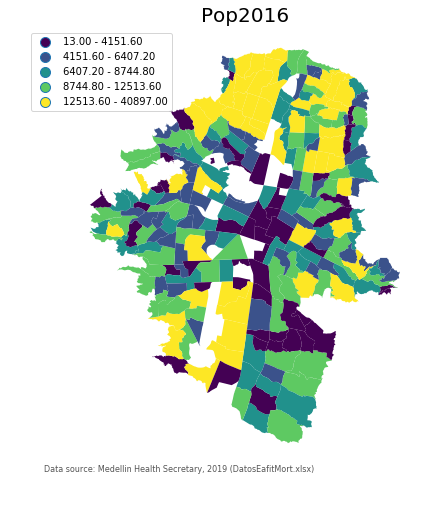

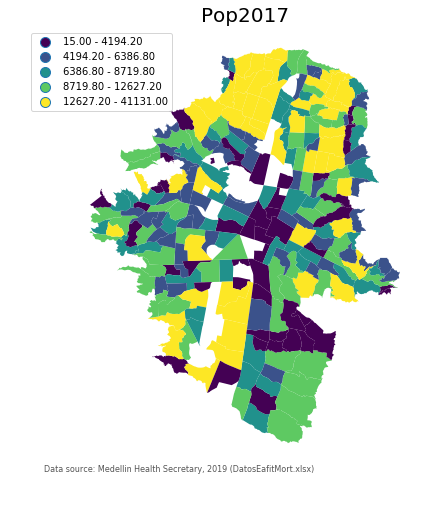

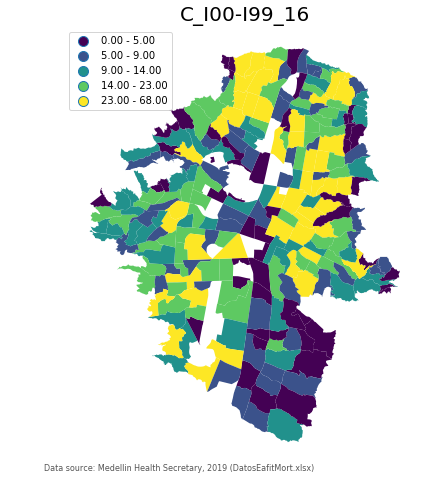

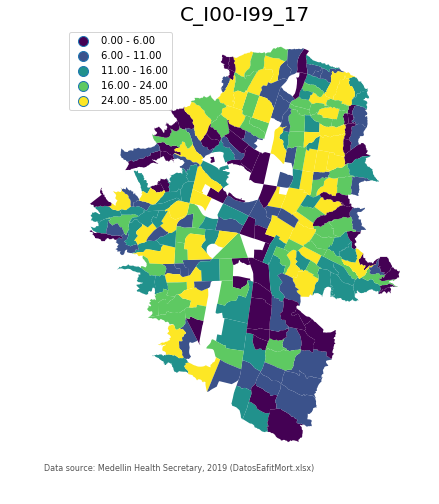

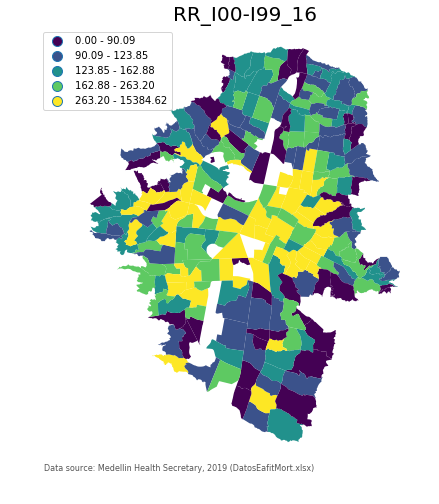

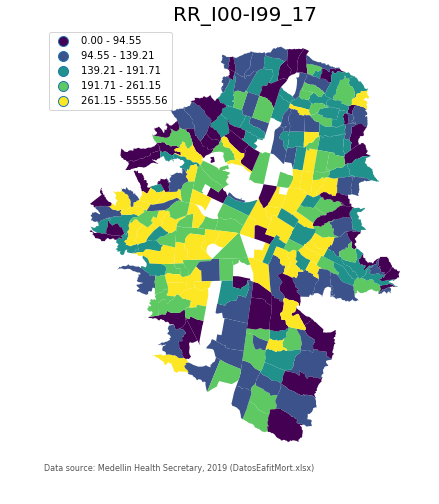

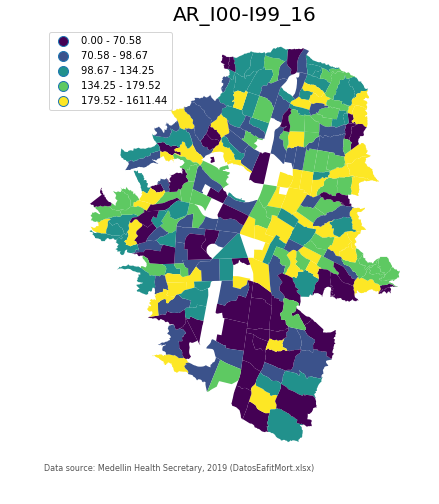

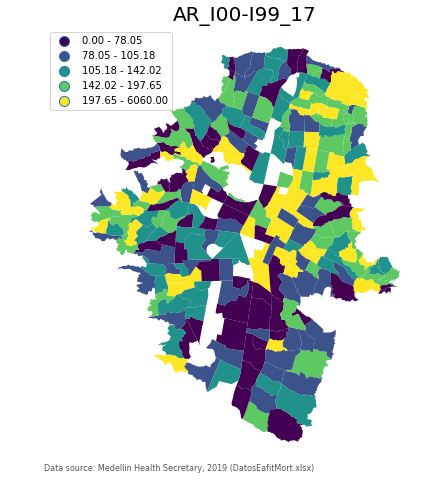

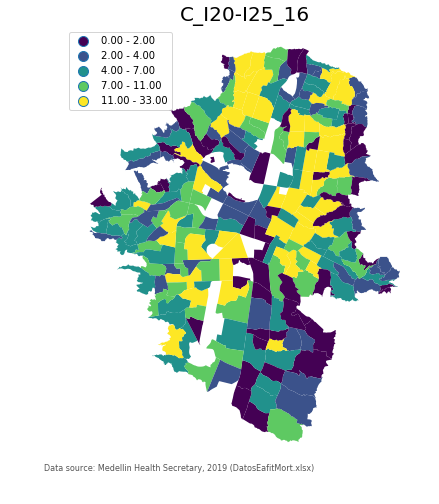

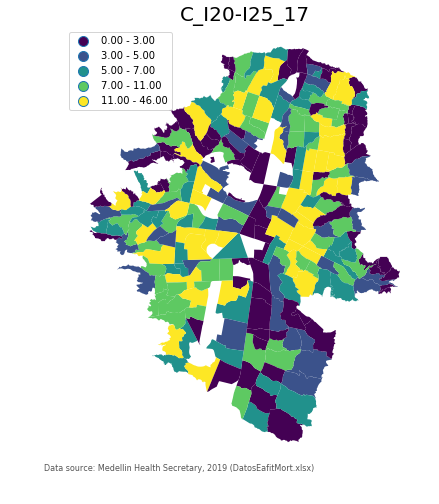

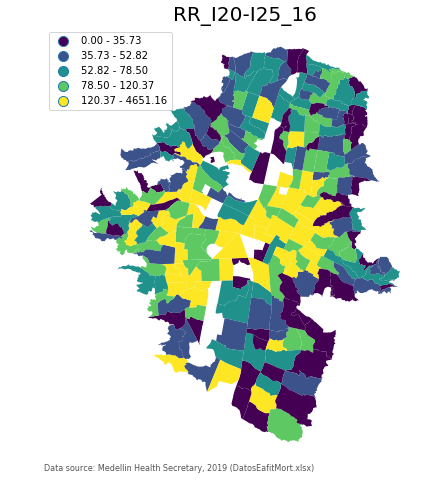

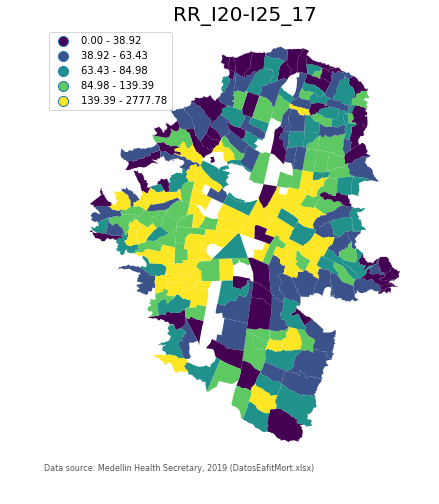

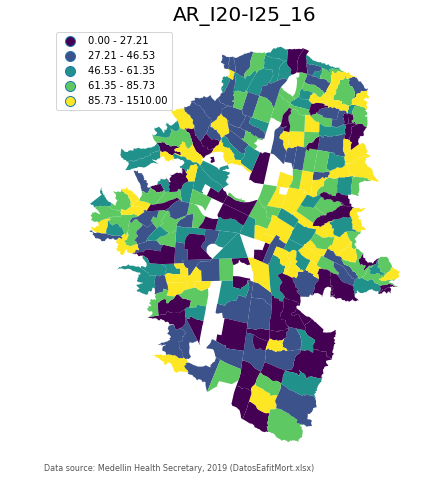

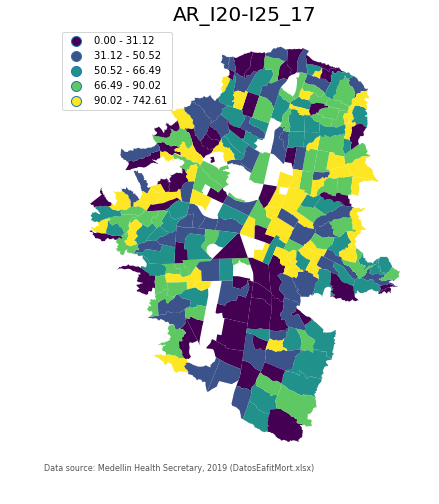

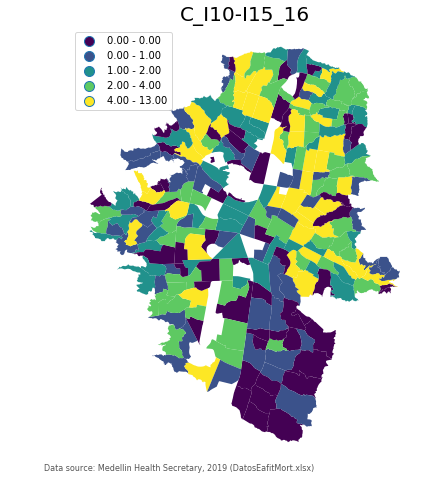

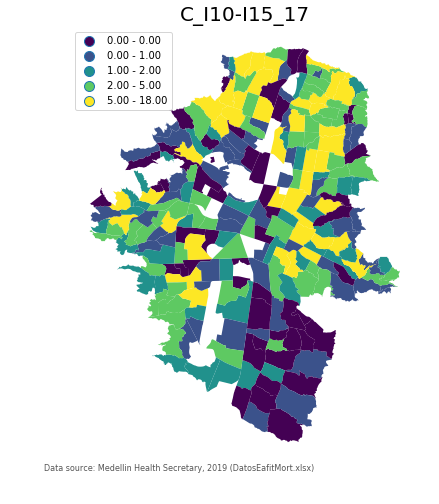

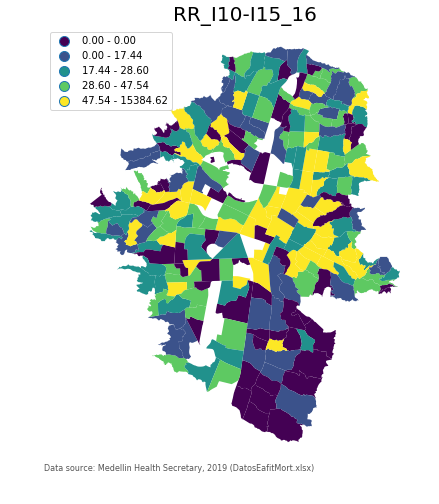

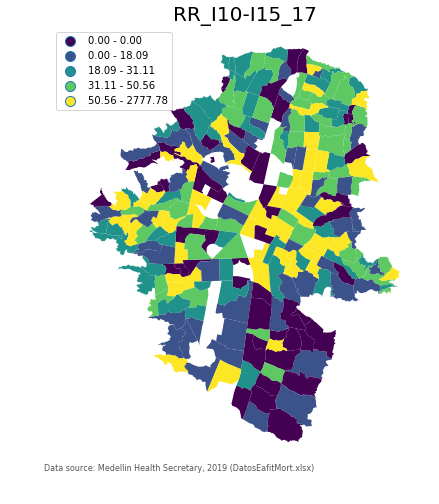

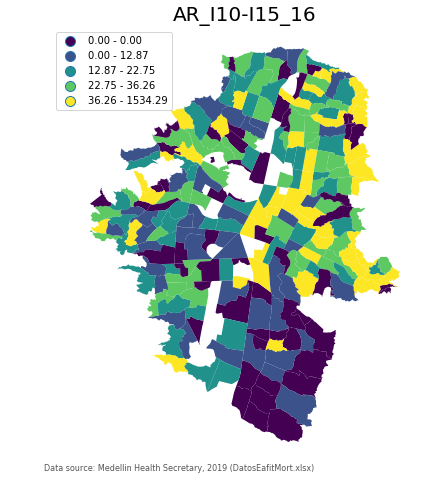

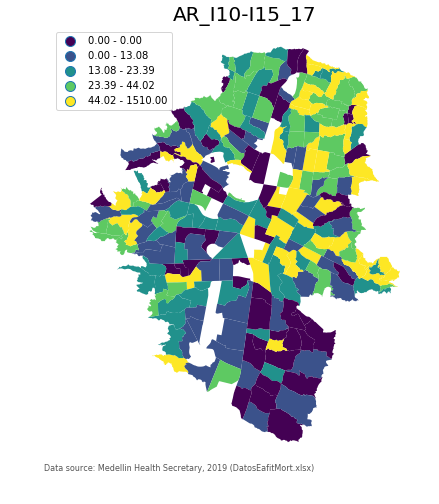

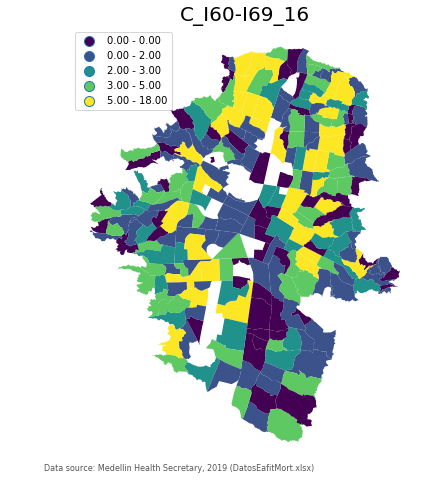

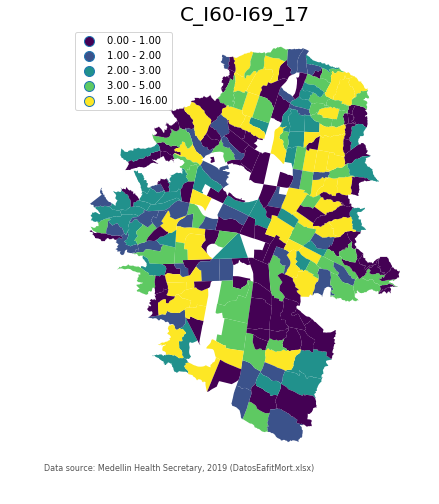

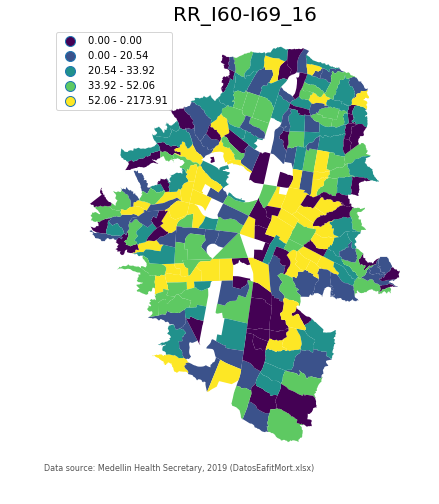

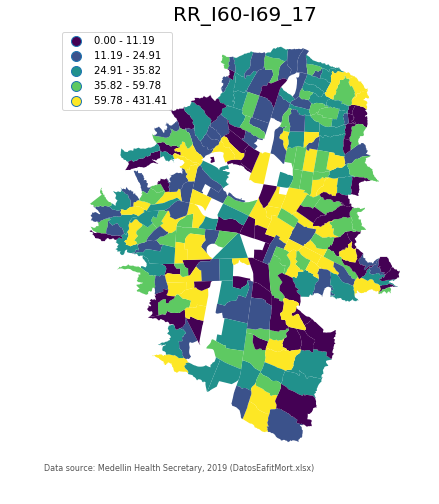

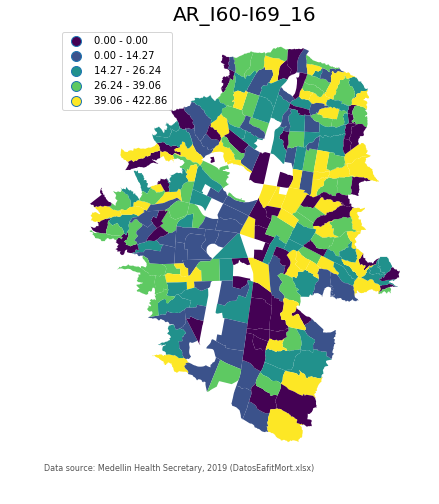

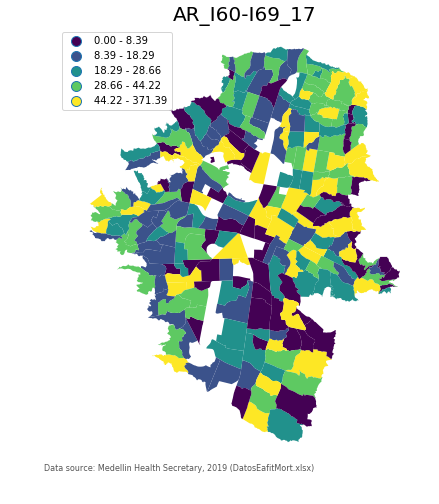

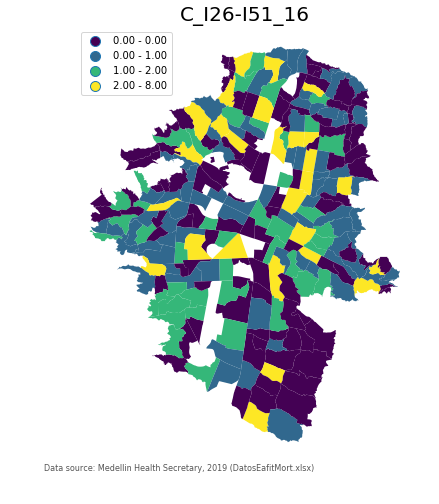

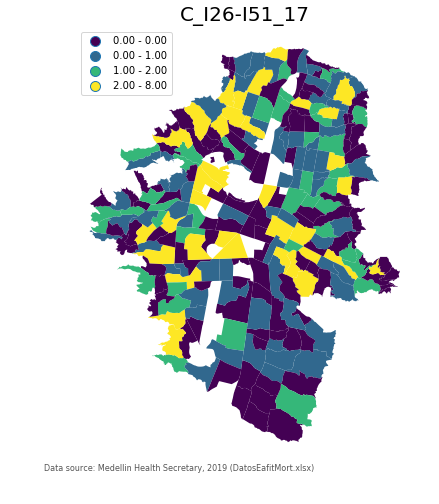

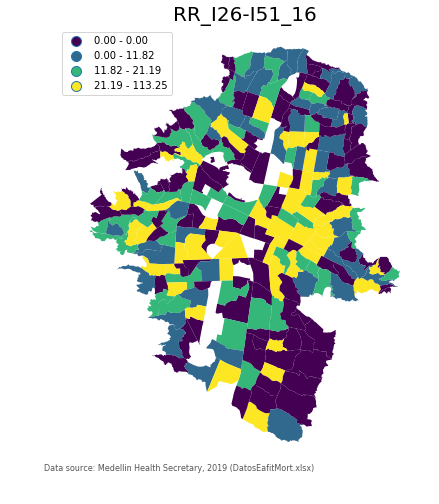

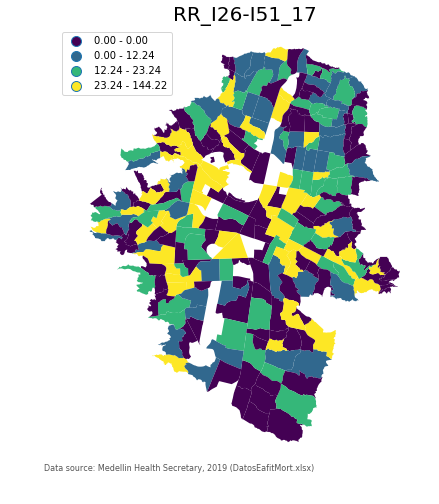

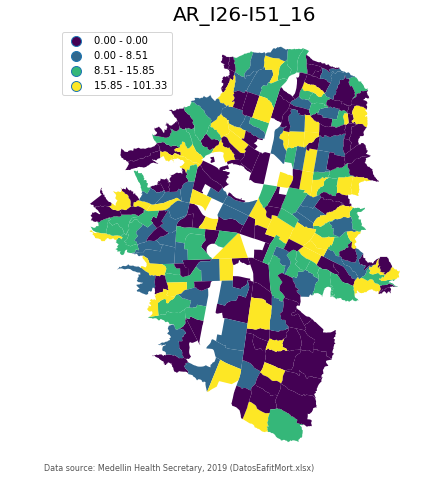

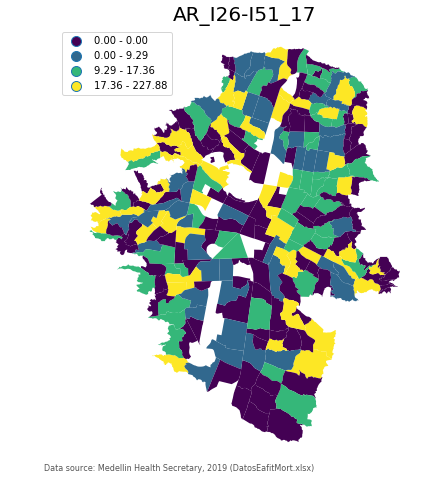

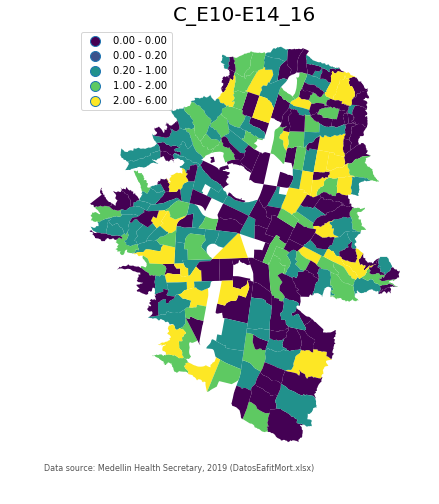

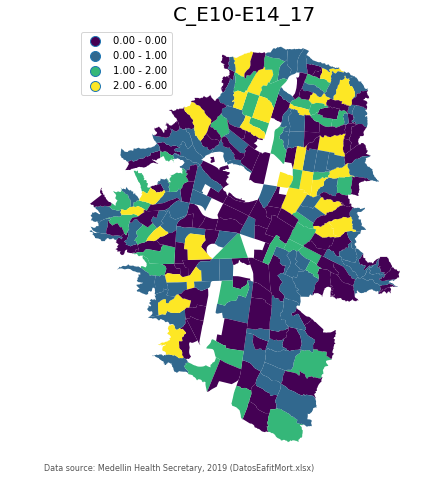

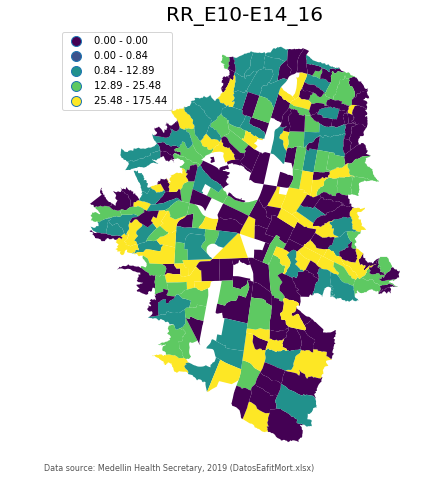

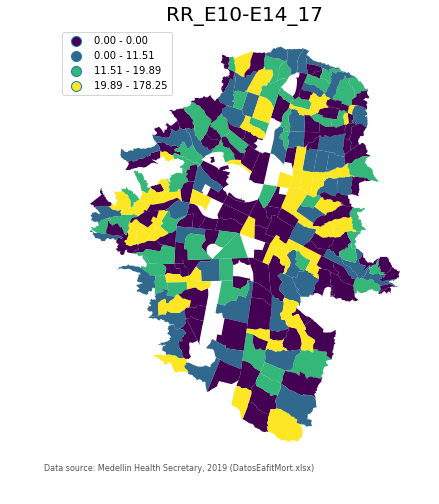

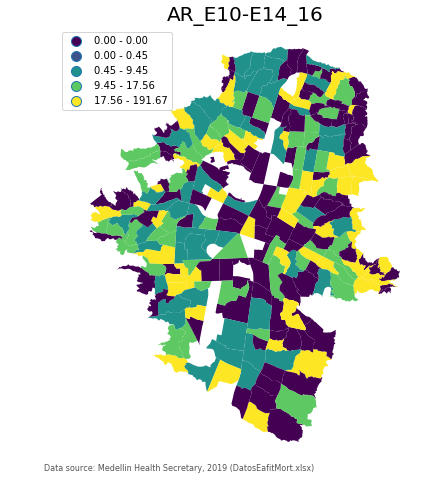

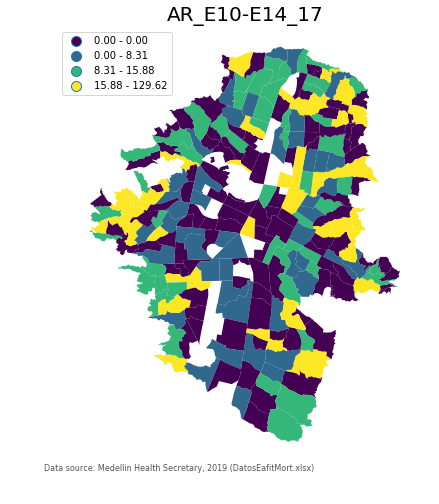

In [12]:
# Specify columns (fields) to map
plot_fields = column_names[7:]

# Map

for field in plot_fields:
    fig, ax = plt.subplots(1, figsize=(8, 8))
    neigh_rates.plot(column=field, linewidth=0.05, k=5, 
                 scheme='quantiles', ax=ax, cmap='viridis', legend=True)
    ax.set_title(field, fontdict={'fontsize': '20', 'fontweight' : '3'})
    ax.annotate('Data source: Medellin Health Secretary, 2019 (DatosEafitMort.xlsx)',xy=(0.1, .08),
                xycoords='figure fraction', horizontalalignment='left', 
                verticalalignment='top', fontsize=8, color='#555555')
    ax.set_axis_off()
    ax.set_aspect('equal')
    leg = ax.get_legend()
    leg.set_bbox_to_anchor((0.1, 0.8, 0.2, 0.2))
    plt.show()
    fig_path = '../maps-png/' + str(field) + '.png'
    fig.savefig(fig_path, dpi=300)